## Task

Work with HTML, download all listings (at least 200), add error handling to your function, save your data, and push to GitHub. 
Read the data from git, perform data cleaning, transformations, and create at least 5 different plots (you can use plotly or plotnine, or your choice). 
Make sure that you also add your findings in text. 
Here, an example can be downloading all the yachts for sale. Post your findings, use gist for code embed.

Link to the [Github repository](https://github.com/artyomashigov/web_scraping_car_sales) 

## Table of content
**1. Web scraping**<br>
**2. Data Cleaning**<br>
**3. Data Visualization and Analysis**<br>
**4. Conclusion**

### Web scraping

In [1]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import cloudscraper
from scrapethat import *
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# get the first page
mainurl = 'https://haycar.am/en/sale/search?category=car&page=1'
response = read_cloud(mainurl)

In [3]:
# find a link for a listing
response.find(class_ = 'filter-left-inner pull-left').find('a')['href']

'/en/car/sale/Toyota-Corolla-2022-5092'

In [4]:
# getting pagelinks for first 10 pages
pagelinks = [f'https://haycar.am/en/sale/search?category=car&page={i}' for i in range(1,11)]

# List to store all listing links
all_listing_links = []

# Iterate through each page link
for page_link in pagelinks:
    # Make a request to the page
    response = read_cloud(page_link)

    # Extract listing links from the current page
    listing_links = ['https://haycar.am' +
                     i.find('a')['href'] for i in response.find_all(class_ = 'filter-left-inner pull-left')]

    # Add the current page's links to the main list
    all_listing_links.extend(listing_links)

In [5]:
# check the length of our list
print(f'We have {len(all_listing_links)} car sales listings.')

We have 300 car sales listings.


In [6]:
# get the data from one page
t = read_cloud('https://haycar.am/en/car/sale/Opel-Vectra-B-1998-5090')
keys = get_texts(t.find_all(class_='property'))
values = get_texts(t.find_all(class_='value'))
data = dict(zip(keys, values))
data

{'Make': 'Opel',
 'Model': 'Vectra B',
 'Body style': 'Sedan',
 'Year': '1998',
 'Car location': 'Armenia, Աբովյան',
 'Mileage': '350000 km',
 'Transmission': 'Manual',
 'Steering wheel': 'Left',
 'State': 'Normal',
 'Color': 'Silver',
 'Engine': 'Gas',
 'Engine volume': '1.8',
 'Interior color': 'Black',
 'Wheels': '15"',
 'Drive': 'Front',
 'Doors': '4',
 'Cylinders': '4',
 'Power': '116'}

In [7]:
# building a function to get one link and return with a dictionary
def get_one_car(link):
    t = read_cloud(link)
    keys = get_texts(t.find_all(class_='property'))
    values = get_texts(t.find_all(class_='value'))
    data = dict(zip(keys, values))
    return(data)

In [8]:
# testing the function
get_one_car('https://haycar.am/en/car/sale/Subaru-%D5%95ther-2020-5089')

{'Make': 'Subaru',
 'Model': 'Օther',
 'Body style': 'SUV',
 'Year': '2020',
 'Car location': 'Georgia, Georgia',
 'Mileage': '30000 km',
 'Transmission': 'CVT',
 'Steering wheel': 'Left',
 'State': 'Excellent',
 'Color': 'Black',
 'Engine': 'Petrol',
 'Engine volume': '2.4',
 'Interior color': 'Black',
 'Drive': 'All',
 'Doors': '5',
 'Cylinders': '4'}

In [9]:
# maping the function to get all cars
data_list = list(map(get_one_car, all_listing_links))
df = pd.DataFrame(data_list)
df.head()

,Make,Model,Body style,Year,Car location,Mileage,Transmission,Steering wheel,State,Color,Engine,Engine volume,Interior color,Doors,Power,Wheels,Drive,Cylinders,VIN Code
0,Toyota,Corolla,Sedan,2022,"Armenia, Երևան",20000 km,Automatic,Left,Excellent,White,Petrol,2,Black,4,169,NaN,NaN,NaN,NaN
1,Opel,Vectra B,Sedan,1998,"Armenia, Աբովյան",350000 km,Manual,Left,Normal,Silver,Gas,1.8,Black,4,116,"15""",Front,4,NaN
2,Subaru,Օther,SUV,2020,"Georgia, Georgia",30000 km,CVT,Left,Excellent,Black,Petrol,2.4,Black,5,NaN,NaN,All,4,NaN
3,BMW,X5,SUV,2023,"Armenia, Ереван",509 mile,Automatic,Left,Excellent,White,Petrol,3,White,5,NaN,NaN,All,NaN,NaN
4,VAZ(Lada),2121,SUV,1989,"Armenia, Մարտունի",180000 km,Manual,Left,Normal,Brown,Petrol,1.6,Brown,2,80,"16""",All,4,NaN


In [10]:
# exporting the data in csv format to download on github
df.to_csv('car_sales.csv')

### Data cleaning

In [11]:
# show all columns
pd.set_option('display.max_columns', None)

In [12]:
# import the dataset from github and check
df = pd.read_csv('https://raw.githubusercontent.com/artyomashigov/web_scraping_car_sales/main/car_sales.csv', index_col = 0)
df.head()

,Make,Model,Body style,Year,Car location,Mileage,Transmission,Steering wheel,State,Color,Engine,Engine volume,Interior color,Doors,Power,Wheels,Drive,Cylinders,VIN Code
0,Toyota,Corolla,Sedan,2022,"Armenia, Երևան",20000 km,Automatic,Left,Excellent,White,Petrol,2.0,Black,4.0,169.0,NaN,NaN,NaN,NaN
1,Opel,Vectra B,Sedan,1998,"Armenia, Աբովյան",350000 km,Manual,Left,Normal,Silver,Gas,1.8,Black,4.0,116.0,"15""",Front,4.0,NaN
2,Subaru,Օther,SUV,2020,"Georgia, Georgia",30000 km,CVT,Left,Excellent,Black,Petrol,2.4,Black,5.0,NaN,NaN,All,4.0,NaN
3,BMW,X5,SUV,2023,"Armenia, Ереван",509 mile,Automatic,Left,Excellent,White,Petrol,3.0,White,5.0,NaN,NaN,All,NaN,NaN
4,VAZ(Lada),2121,SUV,1989,"Armenia, Մարտունի",180000 km,Manual,Left,Normal,Brown,Petrol,1.6,Brown,2.0,80.0,"16""",All,4.0,NaN


In [13]:
# Adding new columns
df['Full Name'] = df['Make'] +' '+ df['Model']
df['Country'] = df['Car location'].str.split(',', expand = True)[0]
# drop car location column
df.drop('Car location', axis=1, inplace=True)

In [14]:
# changing the unit of distance to kms
df['distance'] = df['Mileage'].str.split(expand = True)[0]
df['unit'] = df['Mileage'].str.split(expand = True)[0]
# Convert distance to kilometers
df['Distance_km'] = df.apply(lambda row: row['distance'] * 1.60934 if row['unit'] == 'miles' else row['distance'], axis=1)
# drop unnecessary columns
df.drop(['Mileage','distance','unit','VIN Code'], axis=1, inplace=True)

In [15]:
# Replace NaN values with a default value (e.g., 0) and remove the inch sign
df['Wheels_inches'] = df['Wheels'].str.replace('"', '').fillna('0').astype(int)

# Drop the original 'Wheels' column
df.drop('Wheels', axis=1, inplace=True)

# Change the type to integer
df['Year'] = df['Year'].astype(int)
df['Distance_km'] = df['Distance_km'].astype(int)

In [16]:
# check na values
df.isna().sum()

Make                0
Model               0
Body style          0
Year                0
Transmission        0
Steering wheel      0
State               0
Color               0
Engine            146
Engine volume     152
Interior color    163
Doors             168
Power             198
Drive             162
Cylinders         203
Full Name           0
Country             0
Distance_km         0
Wheels_inches       0
dtype: int64

We decided to keep the columns with many missing values for now, because they can have some valuable additional information for our further analysis

In [17]:
# Reordering columns in the DataFrame
df = df[['Make', 'Model', 'Full Name', 'Body style', 'Year', 'Country', 'Transmission', 'Distance_km', 'Wheels_inches', 'Steering wheel', 'State', 'Color', 'Engine', 'Engine volume', 'Interior color', 'Doors', 'Power', 'Drive', 'Cylinders']]
df.head()

,Make,Model,Full Name,Body style,Year,Country,Transmission,Distance_km,Wheels_inches,Steering wheel,State,Color,Engine,Engine volume,Interior color,Doors,Power,Drive,Cylinders
0,Toyota,Corolla,Toyota Corolla,Sedan,2022,Armenia,Automatic,20000,0,Left,Excellent,White,Petrol,2.0,Black,4.0,169.0,NaN,NaN
1,Opel,Vectra B,Opel Vectra B,Sedan,1998,Armenia,Manual,350000,15,Left,Normal,Silver,Gas,1.8,Black,4.0,116.0,Front,4.0
2,Subaru,Օther,Subaru Օther,SUV,2020,Georgia,CVT,30000,0,Left,Excellent,Black,Petrol,2.4,Black,5.0,NaN,All,4.0
3,BMW,X5,BMW X5,SUV,2023,Armenia,Automatic,509,0,Left,Excellent,White,Petrol,3.0,White,5.0,NaN,All,NaN
4,VAZ(Lada),2121,VAZ(Lada) 2121,SUV,1989,Armenia,Manual,180000,16,Left,Normal,Brown,Petrol,1.6,Brown,2.0,80.0,All,4.0


After doing all the transformations and cleaning we get the final dataset.
The dataset contains information about various cars, including their make, model, features, and specifications. Here are the variables:
- `Make`: Brand of the car.
- `Model`: Model of the car.
- `Full Name`: Full name, combining Make and Model.
- `Body style`: The style of the car body (e.g., Sedan, SUV).
- `Year`: The manufacturing year of the car.
- `Country`: The country where the car is located.
- `Transmission`: Type of transmission (e.g., Automatic, Manual).
- `Distance_km`: Distance covered by the car in kilometers.
- `Wheels_inches`: Size of the wheels in inches.
- `Steering wheel`: Position of the steering wheel (e.g., Left).
- `State`: The state of the car (e.g., Excellent, Normal).
- `Color`: Color of the car.
- `Engine`: Type of engine (e.g., Petrol, Gas).
- `Engine volume`: Volume of the car's engine.
- `Interior color`: Color of the car's interior.
- `Doors`: Number of doors.
- `Power`: Power of the car in some unit (possibly horsepower).
- `Drive`: Type of drive (e.g., Front, All).
- `Cylinders`: Number of cylinders in the engine.

## Data Visualization and Analysis

### Viz 1: Average Horsepower by Make

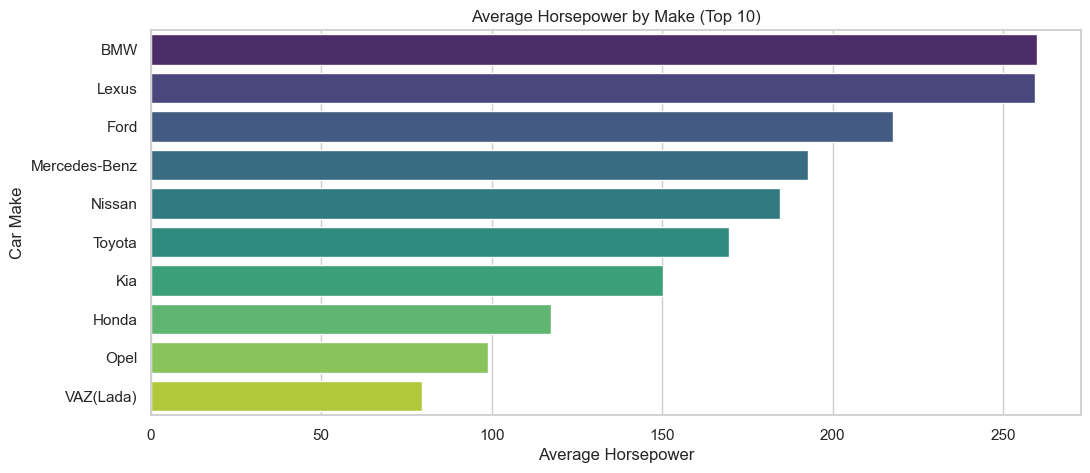

In [18]:
# Calculating average power for each make
power_make_data = df[(df['Power'] > 0) & (df['Make'] != 'Other')]
top_10_makes = power_make_data['Make'].value_counts().head(10).index
power_make_data = power_make_data[power_make_data['Make'].isin(top_10_makes)]
average_power_by_make = power_make_data.groupby('Make')['Power'].mean().sort_values(ascending=False)

# Setting up the visualizations
sns.set(style="whitegrid")
# Creating the bar chart using Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x=average_power_by_make.values, y=average_power_by_make.index,
            palette='viridis')
plt.title('Average Horsepower by Make (Top 10)')
plt.xlabel('Average Horsepower')
plt.ylabel('Car Make')
plt.show()


The bar chart depicting the top 10 car makes by average horsepower reveals some interesting insights into the performance characteristics of different brands. BMW leads the pack, securing the number one position with an average horsepower exceeding 250. This high figure is indicative of BMW's focus on performance and luxury, aligning with its reputation for producing powerful and dynamic vehicles.

Closely following BMW is Lexus, positioned at number two. Lexus, known for combining luxury with performance, also averages over 250 horsepower.

As we move down the list, other familiar names appear, but with a significant drop in average horsepower. 
The tenth position, occupied by a brand with less than 80 horsepower on average, further illustrates this diversity.

### Viz 2: Transmission Types

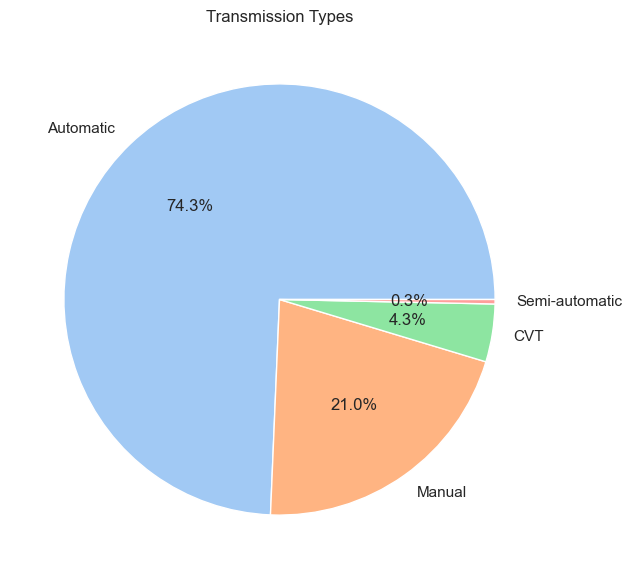

In [19]:
transmission_data = df['Transmission'].value_counts()

# Setting up the visualizations
sns.set(style="whitegrid")

# Creating the pie chart with a bright color palette
plt.figure(figsize=(7, 7))
transmission_data.plot(kind='pie', autopct='%1.1f%%', 
                       colors=sns.color_palette("pastel"))
plt.title('Transmission Types')
plt.ylabel('')  # Hide the y label
plt.show()

The pie chart vividly illustrates the current landscape of transmission preferences in the car market, with automatic transmission overwhelmingly dominating at over 74%. This significant lead is a testament to the growing consumer preference for the convenience and ease of use that automatic cars offer, particularly in urban settings or among drivers who prioritize comfort and ease over manual control. The trend towards automatic transmissions has been gaining momentum over the last 10-20 years, reflecting advancements in automotive technology and shifts in consumer driving habits.

Manual transmissions, holding a substantial 21% of the market, still maintain a loyal following, particularly among enthusiasts who appreciate the control and engagement of a manual gearbox. This preference is often linked to the driving pleasure and the perceived connection between driver and machine that manual transmissions provide.

### Viz 3: Top 10 Car Models

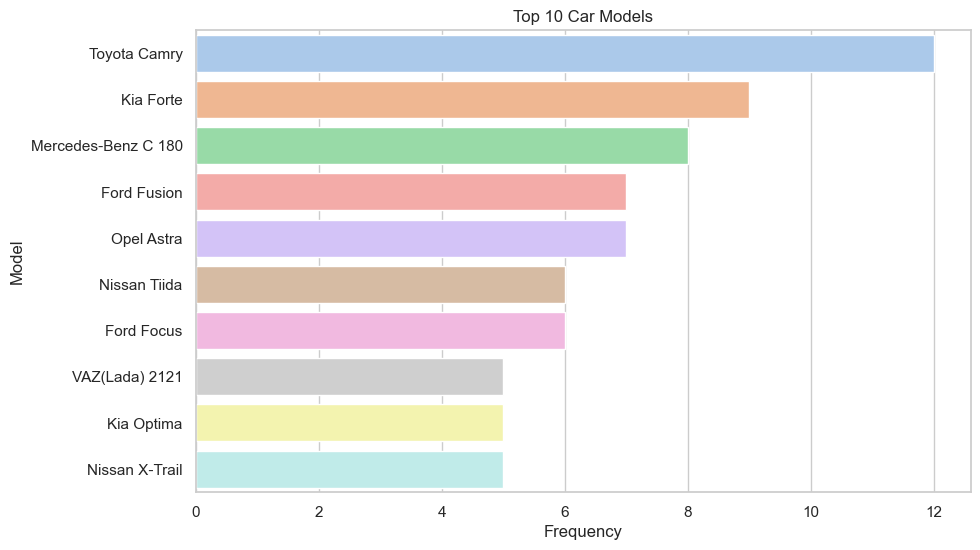

In [20]:
# Selecting the top 10 models
top_10_models = df['Full Name'].value_counts().head(10).index
filtered_data = df[df['Full Name'].isin(top_10_models)]

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=filtered_data['Full Name'].value_counts().index, x=filtered_data['Full Name'].value_counts().values,
            palette='pastel')
plt.title('Top 10 Car Models')
plt.xlabel('Frequency')
plt.ylabel('Model')
plt.show()

The prominence of the Toyota Camry in our dataset, with a total of 12 cars, speaks volumes about its popularity, especially in Armenia where it's a common sight on the streets. Known for its durability, the Camry has earned a reputation as a reliable and long-lasting vehicle, making it a favorite choice among consumers who value longevity and dependability in their cars

### Viz 4: Engine volume by Car Body Style

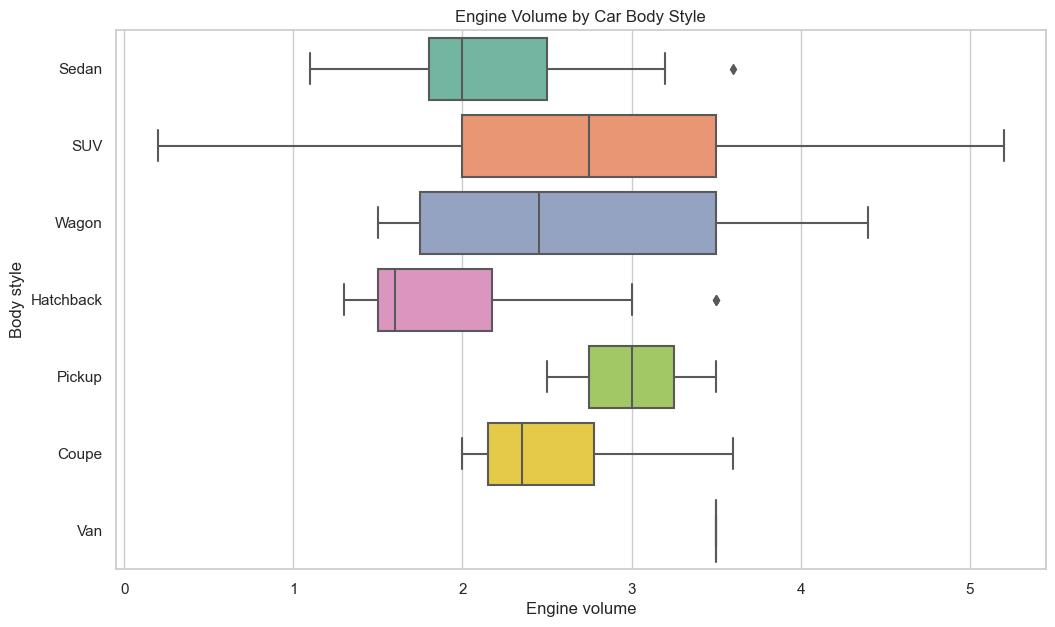

In [21]:
# Filtering out entries with 0 as engine volume 
engine_volume_data = df[df['Engine volume'] > 0]

# Setting up the visualizations
sns.set(style="whitegrid")
# Boxplot of Engine Volume by Body Style
plt.figure(figsize=(12, 7))
sns.boxplot(x='Engine volume', y='Body style', data=engine_volume_data, palette='Set2')
plt.title('Engine Volume by Car Body Style')
plt.show()

The boxplot chart provides a revealing look into how engine volumes vary across different car body styles. It illustrates that Hatchbacks typically have the smallest engines, aligning with their design philosophy of compactness and efficiency, making them ideal for city driving and lower fuel consumption. On the other hand, SUVs and Wagons, known for their versatility and space, tend to feature larger engines, which is reflective of their need to provide more power and capability, whether it's for off-road adventures or accommodating larger payloads. While Pickups in our dataset also exhibit large engine sizes, which can indicate their performance for heavy-duty tasks, the limited number of Pickup samples in our data suggests a need for cautious interpretation, as a bigger dataset might offer a more detailed picture of their engine capacity.

### Viz 5: Distance vs Year (in the context of car condition state)

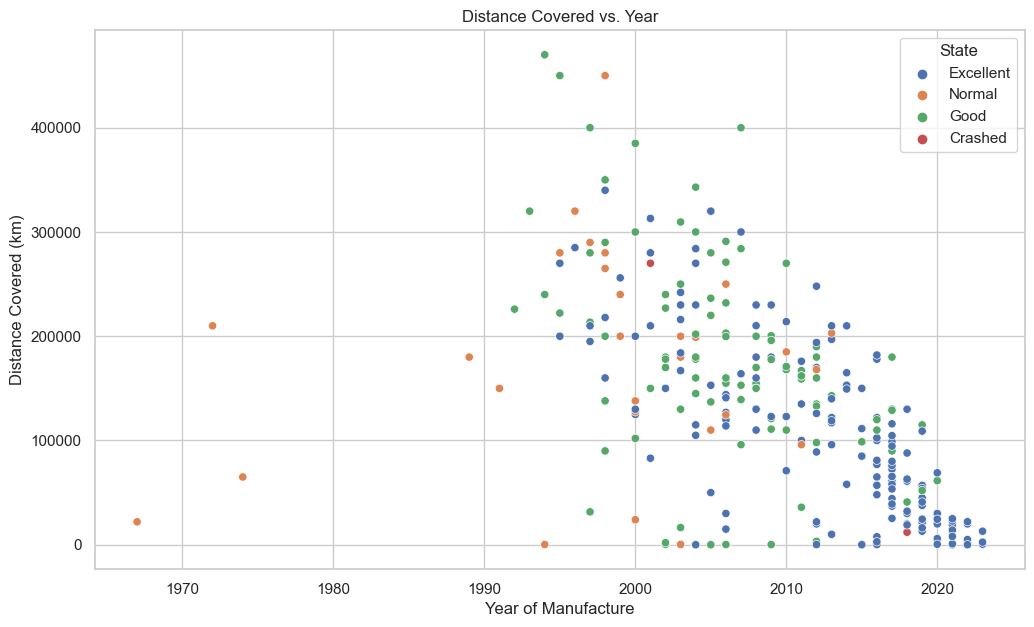

In [22]:
# Scatter Plot of Distance Covered vs. Year
# Filtering out entries with 0
distance_year_data = df[(df['Distance_km'] > 0) & (df['Year'] > 0)]

plt.figure(figsize=(12, 7))
sns.scatterplot(x='Year', y='Distance_km', hue = 'State', data=distance_year_data)
plt.title('Distance Covered vs. Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Distance Covered (km)')
plt.show()

The scatterplot effectively demonstrates a negative correlation between the distance covered by a car and its year of manufacture, illustrating a logical trend where older cars have been driven more. Additionally, the legend in the chart differentiates the dots by the condition of the car, using color coding. Observing the distribution of colors, we notice that blue dots, representing cars in excellent condition, predominantly cluster towards the right side of the plot, indicating newer vehicles. Green dots, signifying good condition, also tend to be more rightward, aligning with moderately recent models. In contrast, orange dots, indicative of cars in normal condition, are more prevalent on the left side of the plot, correlating with older vehicles. This distribution aligns with expectations that newer cars are generally in better condition, while older vehicles are more likely to be classified as normal due to wear and tear over time.

## Conclusion

The project initiated with web scraping, gathering data directly from a car sale website. This process involved extracting information from 300 car listings, converting 300 dictionaries into a comprehensive dataframe. This dataset provided detailed insights into various cars' specifications and features.

From the visualizations, we uncovered several key insights. The most popular car model in the dataset was the Toyota Camry, a frequent sight in Armenia, known for its durability. Our analysis also revealed that automatic transmissions dominate the market, reflecting a growing consumer preference for convenience. The scatter plot showed a clear negative correlation between the distance covered and the year of manufacture, indicating that older cars generally have higher mileage. Additionally, brands like BMW and Lexus stood out for their significantly higher average horsepower, emphasizing their focus on performance.

In summary, this project demonstrated the power of combining effective data collection with detailed analysis. The insights gained from the visualizations offer a deeper understanding of current trends and preferences in the car market. This approach underscores the value of data-driven analysis in making informed observations about consumer behavior and market dynamics in the auto industry.